In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
#data inlezen
df = pd.read_csv('G:\Data Science & PowerBI\drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [20]:
#data uit df vastleggen in onafhankelijke variabele X en afhankelijke variabele Y
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [21]:
#categorische data transformeren in numerieke data
df['Sex'].replace({'F': '1', 'M': '0'}, inplace=True)
df['BP'].replace({'HIGH': '1', 'NORMAL': '0', 'LOW': '2'}, inplace=True)
df['Cholesterol'].replace({'HIGH': '1', 'NORMAL': '0'}, inplace=True)

In [22]:
#zorgen dat de data random wordt ingedeeld in training set en test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

X_train.shape

(140, 5)

In [27]:
#instantie van classifier maken en fitten van de data
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
#Laat de voorspelde uitkomst zien in de test set en de daadwerkelijke uitkomst
PredTree = Tree.predict(X_test)
print (PredTree [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [30]:
#controleren hoe accuraat het model is
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, PredTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [32]:
#visualiseren
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jurgenhofman\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        32.4 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will 



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jurgenhofman\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.16       |     pyhd3deb0d_1          20 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          20 KB

The following NEW packages will be INSTALLED:

  python-graphviz    conda-forge/noarch::python-graphviz-0.16-pyhd3deb0d_1




python-graphviz-0.16 | 20 KB     |            |   0% 
python-graphviz-0.16 | 20 KB     | ########## | 100% 
python-graphviz-0.16 | 20 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


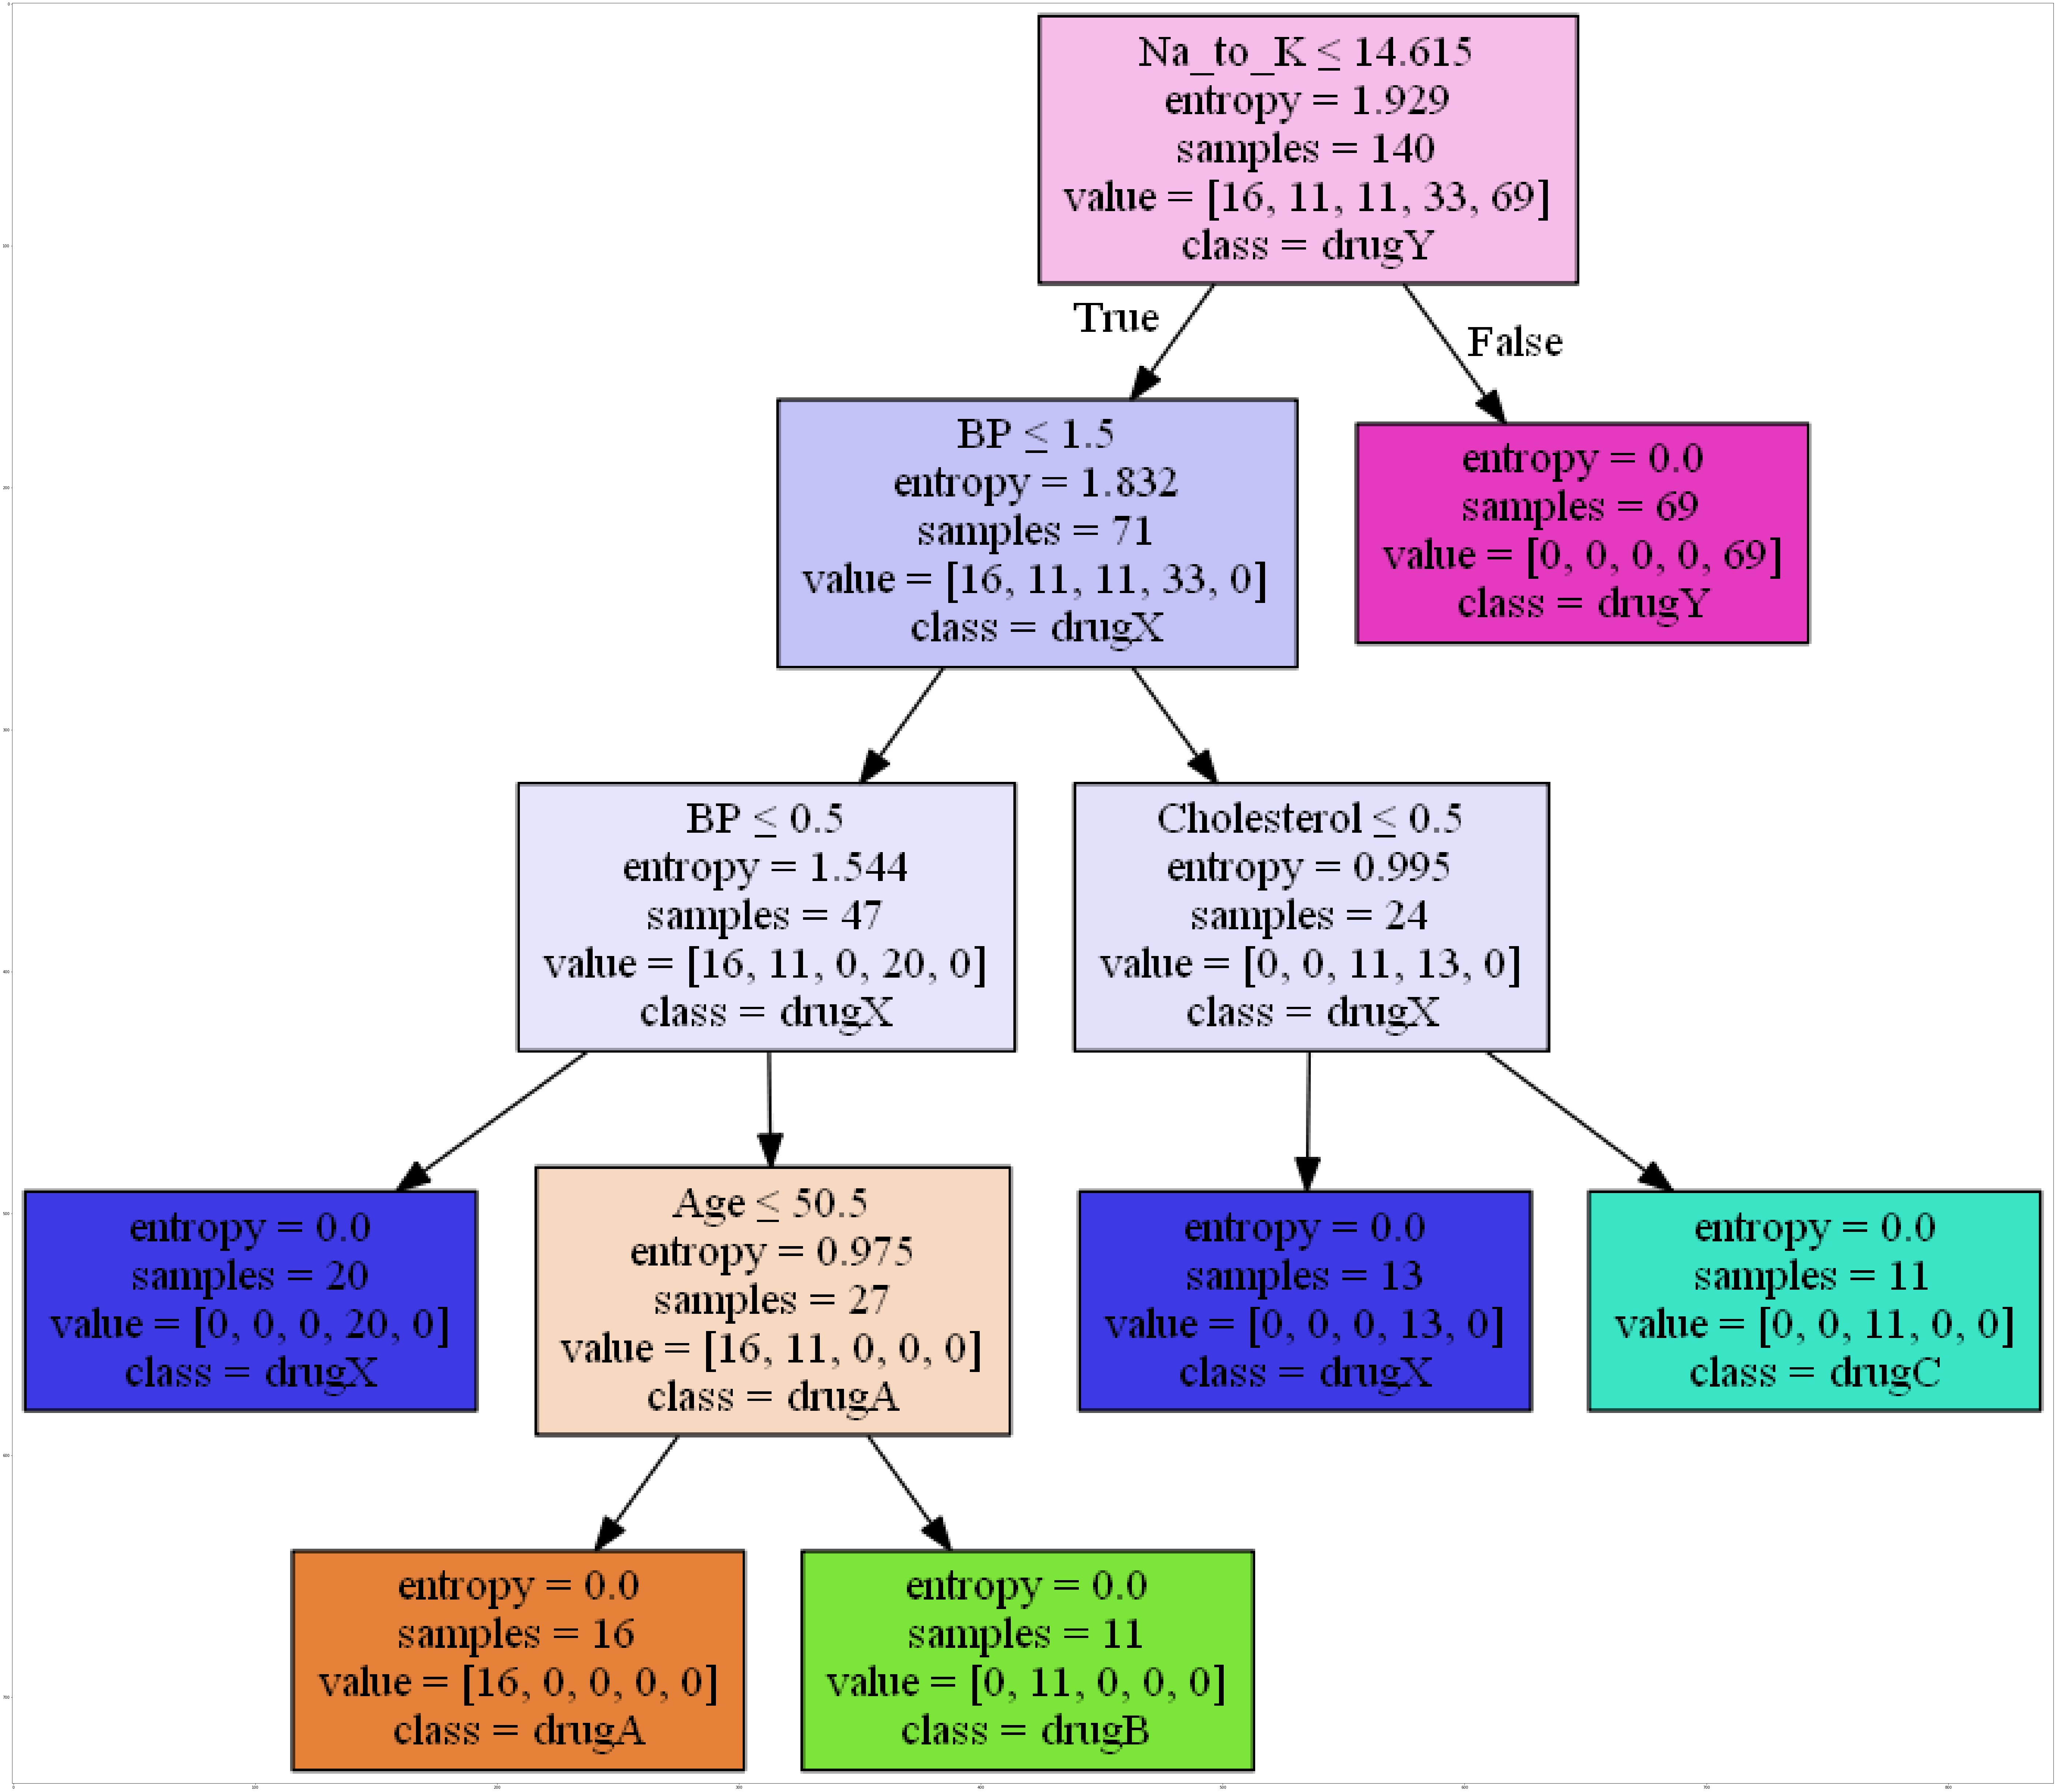

In [33]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')